<a href="https://colab.research.google.com/github/arddhanaza/foodprint-bangkit-capstone/blob/machine_learning/Model_Training_Capstone_ind_food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
root_path = '/drive/MyDrive/datasets'
DIR_DATA = '/content/drive/MyDrive/datasets/ind_data_split/'


In [65]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [66]:
import tensorflow as tf
print(tf.__version__)
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm as note_book_tqdm


note_book_tqdm.pandas(desc='progress: ')

2.5.0


/usr/local/lib/python3.7/dist-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


<function matplotlib.pyplot.show>

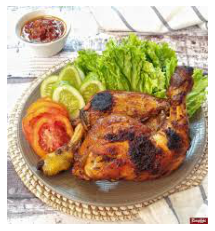

In [67]:
#Show the Image

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

img = mpimg.imread(DIR_DATA+'/train/ayam_goreng_bakar/ayambakar001.jpg')
plt.imshow(img)
plt.axis('Off')
plt.show


In [68]:
#Image Augmentation

training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = training_datagen.flow_from_directory(
    directory = DIR_DATA+'/train/',
    target_size=(150,150),
    batch_size=32,
    shuffle=True,
    class_mode="categorical"
)

validation_generator = validation_datagen.flow_from_directory(
    directory = DIR_DATA+'/val/',
    target_size=(150,150),
    batch_size=32,
    shuffle=True,
    class_mode="categorical"
)

test_generator = test_datagen.flow_from_directory(
    directory = DIR_DATA+'/test/',
    target_size=(150,150),
    batch_size=32,
    shuffle=True,
    class_mode="categorical"
)

Found 1789 images belonging to 8 classes.
Found 221 images belonging to 8 classes.
Found 229 images belonging to 8 classes.


In [91]:
# #Learn a Model
# Last Model
# model = tf.keras.models.Sequential([
#   tf.keras.layers.Conv2D(16,(3,3),padding='same',activation='relu',input_shape=(150,150,3)),
#   tf.keras.layers.MaxPooling2D(2,2),

#   tf.keras.layers.Conv2D(16,(3,3),padding='same',activation='relu'),
#   tf.keras.layers.MaxPooling2D(2,2),

#   tf.keras.layers.Conv2D(32,(3,3),padding='same',activation='relu'),
#   tf.keras.layers.MaxPooling2D(2,2), 
  
#   tf.keras.layers.Conv2D(64, (3,3),padding='same', activation='relu'),
#   tf.keras.layers.MaxPooling2D(2,2),
  
#   tf.keras.layers.Conv2D(64, (3,3),padding='same', activation='relu'),
#   tf.keras.layers.MaxPooling2D(2,2),


#   tf.keras.layers.Flatten(),
#   tf.keras.layers.Dropout(0.5),
#   tf.keras.layers.Dense(256,activation='relu'),
#   tf.keras.layers.Dense(8,activation='softmax')
# ])

# model.summary()

In [95]:
# Transfer Learning
from tensorflow.keras.applications.vgg16 import VGG16

base_model = VGG16(input_shape = (150, 150, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')
for layer in base_model.layers:
    layer.trainable = False

In [97]:
# Transfer Learning
from tensorflow.keras import layers
# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a final sigmoid layer for classification
x = layers.Dense(8, activation='softmax')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=1e-4, decay=1e-4/20),metrics=['accuracy'])


In [99]:
# Model fit
history = model.fit(train_generator, epochs=100,steps_per_epoch=50,validation_data=validation_generator,verbose=1,validation_steps=5)

Epoch 1/100
50/50 [==============================] - 16s 312ms/step - loss: 1.4147 - accuracy: 0.4865 - val_loss: 1.1995 - val_accuracy: 0.5500
Epoch 2/100
50/50 [==============================] - 16s 311ms/step - loss: 1.3066 - accuracy: 0.5153 - val_loss: 1.0457 - val_accuracy: 0.6500
Epoch 3/100
50/50 [==============================] - 16s 311ms/step - loss: 1.1797 - accuracy: 0.5711 - val_loss: 0.9586 - val_accuracy: 0.6687
Epoch 4/100
50/50 [==============================] - 16s 313ms/step - loss: 1.1441 - accuracy: 0.5798 - val_loss: 0.9743 - val_accuracy: 0.5813
Epoch 5/100
50/50 [==============================] - 16s 310ms/step - loss: 1.0868 - accuracy: 0.6074 - val_loss: 0.9132 - val_accuracy: 0.6438
Epoch 6/100
50/50 [==============================] - 16s 309ms/step - loss: 1.0333 - accuracy: 0.6244 - val_loss: 0.9702 - val_accuracy: 0.6250
Epoch 7/100
50/50 [==============================] - 16s 312ms/step - loss: 1.0335 - accuracy: 0.6149 - val_loss: 0.9235 - val_accuracy:

In [84]:
# #Testing

# model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=1e-4, decay=1e-4/20),metrics=['accuracy'])
# # history = model.fit(train_generator, epochs=EPOCHS, steps_per_epoch=10,validation_data=test_generator,verbose=1,validation_steps=3)
# history = model.fit(train_generator, epochs=100,steps_per_epoch=50,validation_data=validation_generator,verbose=1,validation_steps=5)



Epoch 1/100
50/50 [==============================] - 15s 282ms/step - loss: 1.9575 - accuracy: 0.2116 - val_loss: 1.9123 - val_accuracy: 0.1688
Epoch 2/100
50/50 [==============================] - 14s 275ms/step - loss: 1.8719 - accuracy: 0.2225 - val_loss: 1.8459 - val_accuracy: 0.2250
Epoch 3/100
50/50 [==============================] - 14s 275ms/step - loss: 1.8503 - accuracy: 0.2417 - val_loss: 1.8153 - val_accuracy: 0.2875
Epoch 4/100
50/50 [==============================] - 14s 276ms/step - loss: 1.8071 - accuracy: 0.2699 - val_loss: 1.7387 - val_accuracy: 0.3187
Epoch 5/100
50/50 [==============================] - 14s 276ms/step - loss: 1.7522 - accuracy: 0.3068 - val_loss: 1.7384 - val_accuracy: 0.3438
Epoch 6/100
50/50 [==============================] - 14s 272ms/step - loss: 1.7133 - accuracy: 0.3475 - val_loss: 1.7453 - val_accuracy: 0.2937
Epoch 7/100
50/50 [==============================] - 14s 274ms/step - loss: 1.6753 - accuracy: 0.3469 - val_loss: 1.6391 - val_accuracy:

In [100]:
model.evaluate(test_generator)

8/8 [==============================] - 3s 321ms/step - loss: 0.9015 - accuracy: 0.7249


[0.901473343372345, 0.7248908281326294]

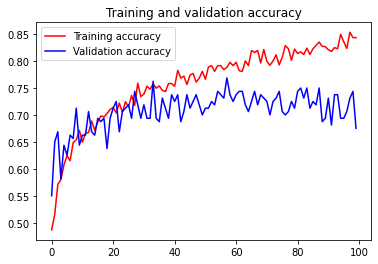

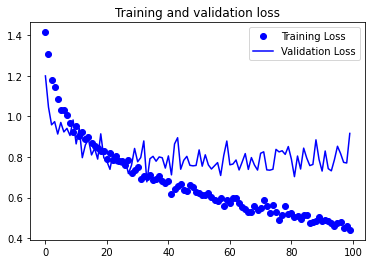

In [101]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()


plt.show()

In [112]:
path = '/content/drive/MyDrive/model/ind_food/model_2/model_2_6_21.h5'
model.save(path)

In [74]:
# from tensorflow import keras
# path = '/content/drive/MyDrive/model/ind_food/model_2/model.h5'
# model = keras.models.load_model(path)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide


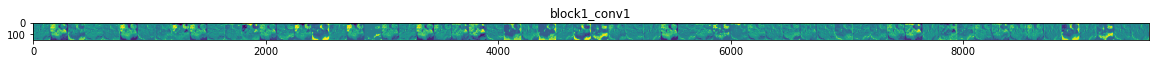

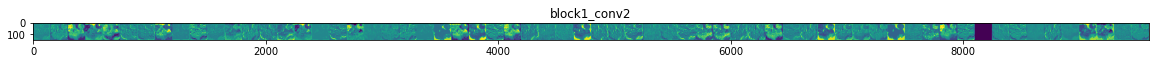

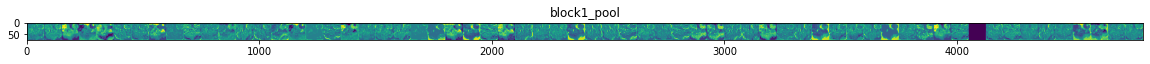

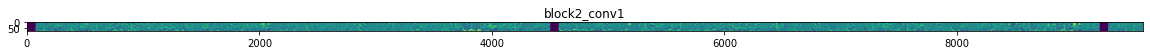

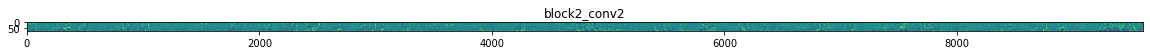

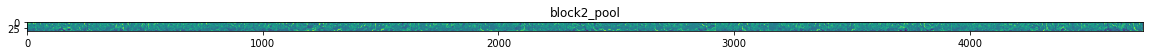

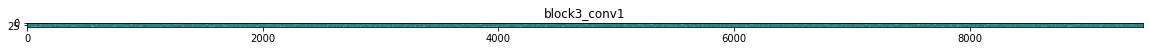

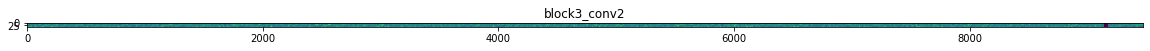

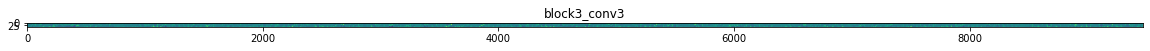

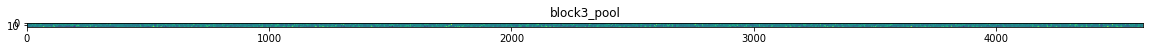

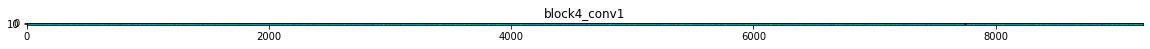

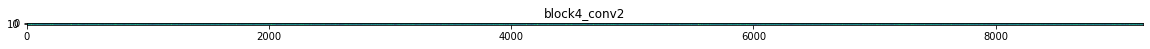

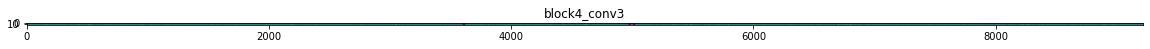

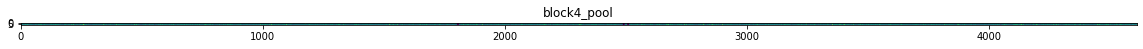

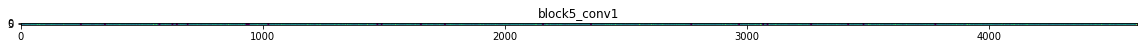

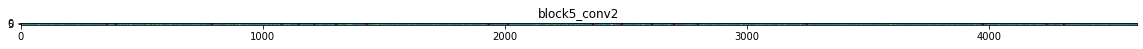

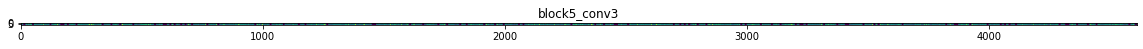

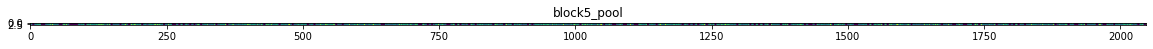

In [102]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
# horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
# human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]

# img_path = random.choice(horse_img_files + human_img_files)
img_path = DIR_DATA + '/train/ayam_goreng_bakar/ayamgoreng001.jpg'

img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:]]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [113]:
!pip install tensorflowjs
!tensorflowjs_converter --input_format=keras {path} '/content/drive/MyDrive/model/ind_food/model_2/model_js'./

2021-06-02 13:43:20.172367: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [103]:
food_class = ['ayam_goreng_bakar','ayam_krispi','bakso','mi_ayam','rendang_daging','sate','soto_ayam','soto_daging']
component = ['ayam','ayam','sapi','ayam','sapi','ayam','ayam','sapi']
score =  {
    'ayam' : 4.56,
    'sapi' : 32.5
}

In [110]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)


  images = np.vstack([x])
  classes = model.predict(images, batch_size=32)
  # y_classes = keras.np_utils.probas_to_classes(classes)
  print(fn)
  print(classes[0])
  # print(y_classes)

Saving ayambakar012.jpg to ayambakar012.jpg
ayambakar012.jpg
[1. 0. 0. 0. 0. 0. 0. 0.]


In [111]:
print('Makanan: ', food_class[np.argmax(classes[0])])
print('Bahan Dasar utama: ', component[np.argmax(classes[0])])
print('Jejak Karbon: ', score.get(component[np.argmax(classes[0])]) ,' kg/ porsi')

Makanan:  ayam_goreng_bakar
Bahan Dasar utama:  ayam
Jejak Karbon:  4.56  kg/ porsi


In [114]:
ind_food_saved_model = "ind_food_saved_model"
tf.saved_model.save(model, ind_food_saved_model)


FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.
INFO:tensorflow:Assets written to: ind_food_saved_model/assets


In [115]:
%%bash -s $ind_food_saved_model
saved_model_cli show --dir $1 --tag_set serve --signature_def serving_default

The given SavedModel SignatureDef contains the following input(s):
  inputs['input_2'] tensor_info:
      dtype: DT_FLOAT
      shape: (-1, 150, 150, 3)
      name: serving_default_input_2:0
The given SavedModel SignatureDef contains the following output(s):
  outputs['dense_11'] tensor_info:
      dtype: DT_FLOAT
      shape: (-1, 8)
      name: StatefulPartitionedCall:0
Method name is: tensorflow/serving/predict


In [116]:
# load the model

loaded = tf.saved_model.load(ind_food_saved_model)
print(list(loaded.signatures.keys()))
infer = loaded.signatures["serving_default"]
print(infer.structured_input_signature)
print(infer.structured_outputs)

['serving_default']
((), {'input_2': TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name='input_2')})
{'dense_11': TensorSpec(shape=(None, 8), dtype=tf.float32, name='dense_11')}


In [117]:
# convert to tflite

converter = tf.lite.TFLiteConverter.from_saved_model(ind_food_saved_model)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()

tflite_model_file = 'converted_ind_food_model.tflite'
with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

In [118]:
# download the tflite asset

from google.colab import files
files.download('converted_ind_food_model.tflite')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>